# Preparation

## import tools

In [1]:
import os, numpy as np
import histogram.hdf as hh
import mcvine, mcvine.components, mcvine.run_script

from matplotlib import pyplot as plt
%matplotlib notebook

## work dir

In [2]:
workdir = os.path.expanduser("~/simulations/mcvine/demo/2.adjust_parameters")
!mkdir -p {workdir}
%cd {workdir}

/home/97n/simulations/mcvine/demo/2.adjust_parameters


# Explore

## create a script containing an instrument method with a parameter

In [3]:
%%file myinstrument.py
import mcvine, mcvine.components
def instrument(E0=60):
    instrument = mcvine.instrument()
    source = mcvine.components.sources.Source_simple('source', E0=E0)
    instrument.append(source, position=(0,0,0))
    monitor = mcvine.components.monitors.E_monitor('monitor', filename='IE.dat', Emin=0, Emax=130)
    instrument.append(monitor, position=(0,0,1))
    return instrument

Writing myinstrument.py


## run simulation using MPI, setting the parameter

In [4]:
%%time
mcvine.run_script.run_mpi('myinstrument.py', "out", 1e6, nodes=10, overwrite_datafiles=True, E0=70)

Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
Source_simple: initialized.
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
Source_simple: initialized.
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1


<E> : 69.9811 meV , E-width : 5.81347 meV 
E_monitor: saved data to file 'IE.dat'.
E_monitor: finalized.
finalize component "monitor"
finalize component "source"
finalize component "source"
<E> : 70.0001 meV , E-width : 5.78003 meV 
E_monitor: saved data to file 'IE.dat'.
E_monitor: finalized.
finalize component "monitor"
CPU times: user 22.7 ms, sys: 19.4 ms, total: 42.1 ms
Wall time: 1.2 s


## check simulation results

<IPython.core.display.Javascript object>


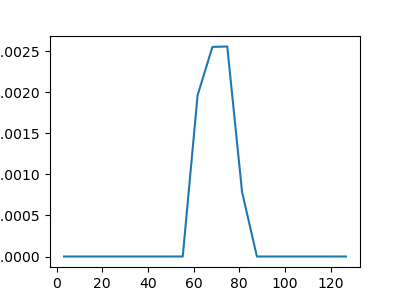

In [6]:
IE = hh.load('./out/IE.h5')
plt.figure(figsize=(4,3))
plt.plot(IE.energy, IE.I)

# Run a series of simulations, varying parameters

## simulate

In [19]:
for E0 in np.arange(20, 120, 30.):
    print(E0)
    mcvine.run_script.run_mpi('myinstrument.py', "work", 1e6, nodes=10, overwrite_datafiles=True, E0=float(E0))
    !cp work/IE.h5 IE_E_{E0}.h5
    !rm -rf work
    continue

20.0
Source_simple: initialized.
Source_simple: initialized.
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1,

50.0
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
Source_simple: initialized.
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
Source_simple: initialized.
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1,

80.0
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
Source_simple: initialized.
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1,

110.0
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
Source_simple: initialized.
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
Source_simple: initialized.
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1

## check results

In [12]:
ls -tl IE_E*.h5

-rw-rw-r-- 1 97n 97n 16408 May  5 11:37 IE_E_110.0.h5
-rw-rw-r-- 1 97n 97n 16408 May  5 11:37 IE_E_80.0.h5
-rw-rw-r-- 1 97n 97n 16408 May  5 11:37 IE_E_50.0.h5
-rw-rw-r-- 1 97n 97n 16408 May  5 11:37 IE_E_20.0.h5


<IPython.core.display.Javascript object>


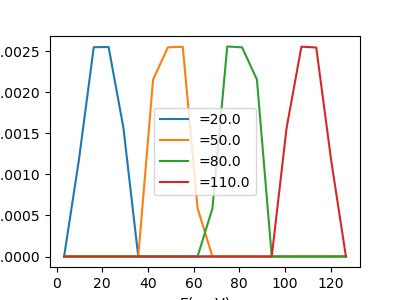

Text(0.5, 0, 'E(meV)')

In [20]:
plt.figure(figsize=(4,3))
for E0 in np.arange(20, 120, 30.):
    h = hh.load('IE_E_{}.h5'.format(E0))
    plt.plot(h.energy, h.I, label="={}".format(E0))
    continue
plt.legend()
plt.xlabel("E(meV)")

# Debug simulation script

create yaml file to store the parameters

In [15]:
%%file params.yaml
E0: 100

Writing params.yaml


run simulation

In [16]:
!python -m "mcvine.run_script" myinstrument.py \
    --workdir debug --overwrite_datafiles \
    --ncount 1000000 --buffer_size 20000 \
    --run-pps \
    --additional-kargs params.yaml

/home/97n/dv/mcvine/export-3.7/lib/python3.7/site-packages/mcvine/run_script.py:201: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  kwds = yaml.load(open(additional_kargs))
/home/97n/dv/mcvine/export-3.7/lib/python3.7/site-packages/mcvine/run_script.py:163: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  argspec = inspect.getargspec(method)
Source_simple: initialized.
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
finalize component "source"
Source_simple: initialized.
<E> : 99.9418 meV , E-width : 5.77318 meV 
E_monitor: saved data to file 'IE.dat'.
E_monitor: finalized.
finalize component "monitor"
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
finalize component "source"
Source_simple: initialized.
<E> : 100.005 meV , E-width

finalize component "source"
Source_simple: initialized.
<E> : 100.021 meV , E-width : 5.79778 meV 
E_monitor: saved data to file 'IE.dat'.
E_monitor: finalized.
finalize component "monitor"
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
finalize component "source"
Source_simple: initialized.
<E> : 99.9634 meV , E-width : 5.78124 meV 
E_monitor: saved data to file 'IE.dat'.
E_monitor: finalized.
finalize component "monitor"
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
finalize component "source"
Source_simple: initialized.
<E> : 100.004 meV , E-width : 5.80251 meV 
E_monitor: saved data to file 'IE.dat'.
E_monitor: finalized.
finalize component "monitor"
E_monitor: initialized. E window=0,130, x window=-0.1,0.1, y window = -0.1, 0.1
finalize component "source"
Source_simple: initialized.
<E> : 100.087 meV , E-width : 5.77253 meV 
E_monitor: saved data to file 'IE.dat'.
E_monitor: finalized.
finalize component "monitor"


<IPython.core.display.Javascript object>


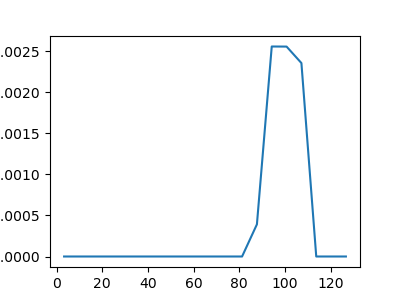

In [18]:
IE = hh.load('./debug/IE.h5')
plt.figure(figsize=(4,3))
plt.plot(IE.energy, IE.I)